<font size=6 color="red">实现一个有向无环的dask案例</font>

In [5]:
#########有向无环图实现
from operator import add
dsk = {
    "a":2,
    "b":2,
    "result":(add,"a","b")
}

import dask
res = dask.get(dsk,"result")
print(res)

4


In [4]:
#########有向无环图实现
def f1(num,num1):
    return num+num1
dsk = {
    "a":2,
    "b":2,
    "result":(f1,"a","b")
}

import dask
res = dask.get(dsk,"result")
print(res)

4


<font size=6 color="red">dask 数组</font>

In [5]:
#########有向无环图实现
def f2(num,num1):
    return num+num1
dsk1 = {
    "a":2,
    "b":2,
    "result1":(f2,"a","b")
}

import dask
res = dask.get(dsk1,"result1")
print(res)

4


In [12]:
import numpy as np
a = np.random.rand(30)
print(a)

import dask.array as da
a_da = da.from_array(a,chunks=10)
print("a:",dict(a_da.dask))


[0.166483   0.80982797 0.07258018 0.92616874 0.04002136 0.31427949
 0.61813348 0.98435235 0.86642098 0.57241389 0.57747948 0.53369643
 0.05097092 0.170538   0.71967857 0.35052925 0.6471848  0.47997937
 0.4933677  0.43915171 0.10421841 0.62207356 0.73656996 0.96990505
 0.24629931 0.78926049 0.30071588 0.5451804  0.62202947 0.62285449]
a: {('array-04e172ab9aa60fde61968461ca677cdc', 1): (<built-in function getitem>, 'array-original-04e172ab9aa60fde61968461ca677cdc', (slice(10, 20, None),)), ('array-04e172ab9aa60fde61968461ca677cdc', 2): (<built-in function getitem>, 'array-original-04e172ab9aa60fde61968461ca677cdc', (slice(20, 30, None),)), ('array-04e172ab9aa60fde61968461ca677cdc', 0): (<built-in function getitem>, 'array-original-04e172ab9aa60fde61968461ca677cdc', (slice(0, 10, None),)), 'array-original-04e172ab9aa60fde61968461ca677cdc': array([0.166483  , 0.80982797, 0.07258018, 0.92616874, 0.04002136,
       0.31427949, 0.61813348, 0.98435235, 0.86642098, 0.57241389,
       0.57747948

In [3]:
import dask.array as da
import numpy as np
import time
start = time.time()
N = 100000000
chunksize = 1000000

x_data = np.random.uniform(-1,1,N)
y_data = np.random.uniform(-1,1,N)

x = da.from_array(x_data,chunks = chunksize)
y = da.from_array(y_data,chunks = chunksize)

hit_test = x**2 + y**2 < 1
hits = hit_test.sum()
pi = 4 * hits / N
print("pi:",pi.compute())
end = time.time()
print(end - start)

pi: 3.14145556
4.775996923446655


In [1]:
import dask.array as da
import numpy as np
import time
start = time.time()
N = 10
chunksize = 2

x_data = np.random.uniform(-1,1,N)
y_data = np.random.uniform(-1,1,N)

x = da.from_array(x_data,chunks = chunksize)
y = da.from_array(y_data,chunks = chunksize)

hit_test = x**2 + y**2 < 1
hits = hit_test.sum()
pi = 4 * hits / N
print("pi:",pi.compute())
end = time.time()
print(end - start)

pi: 4.0
0.012965917587280273


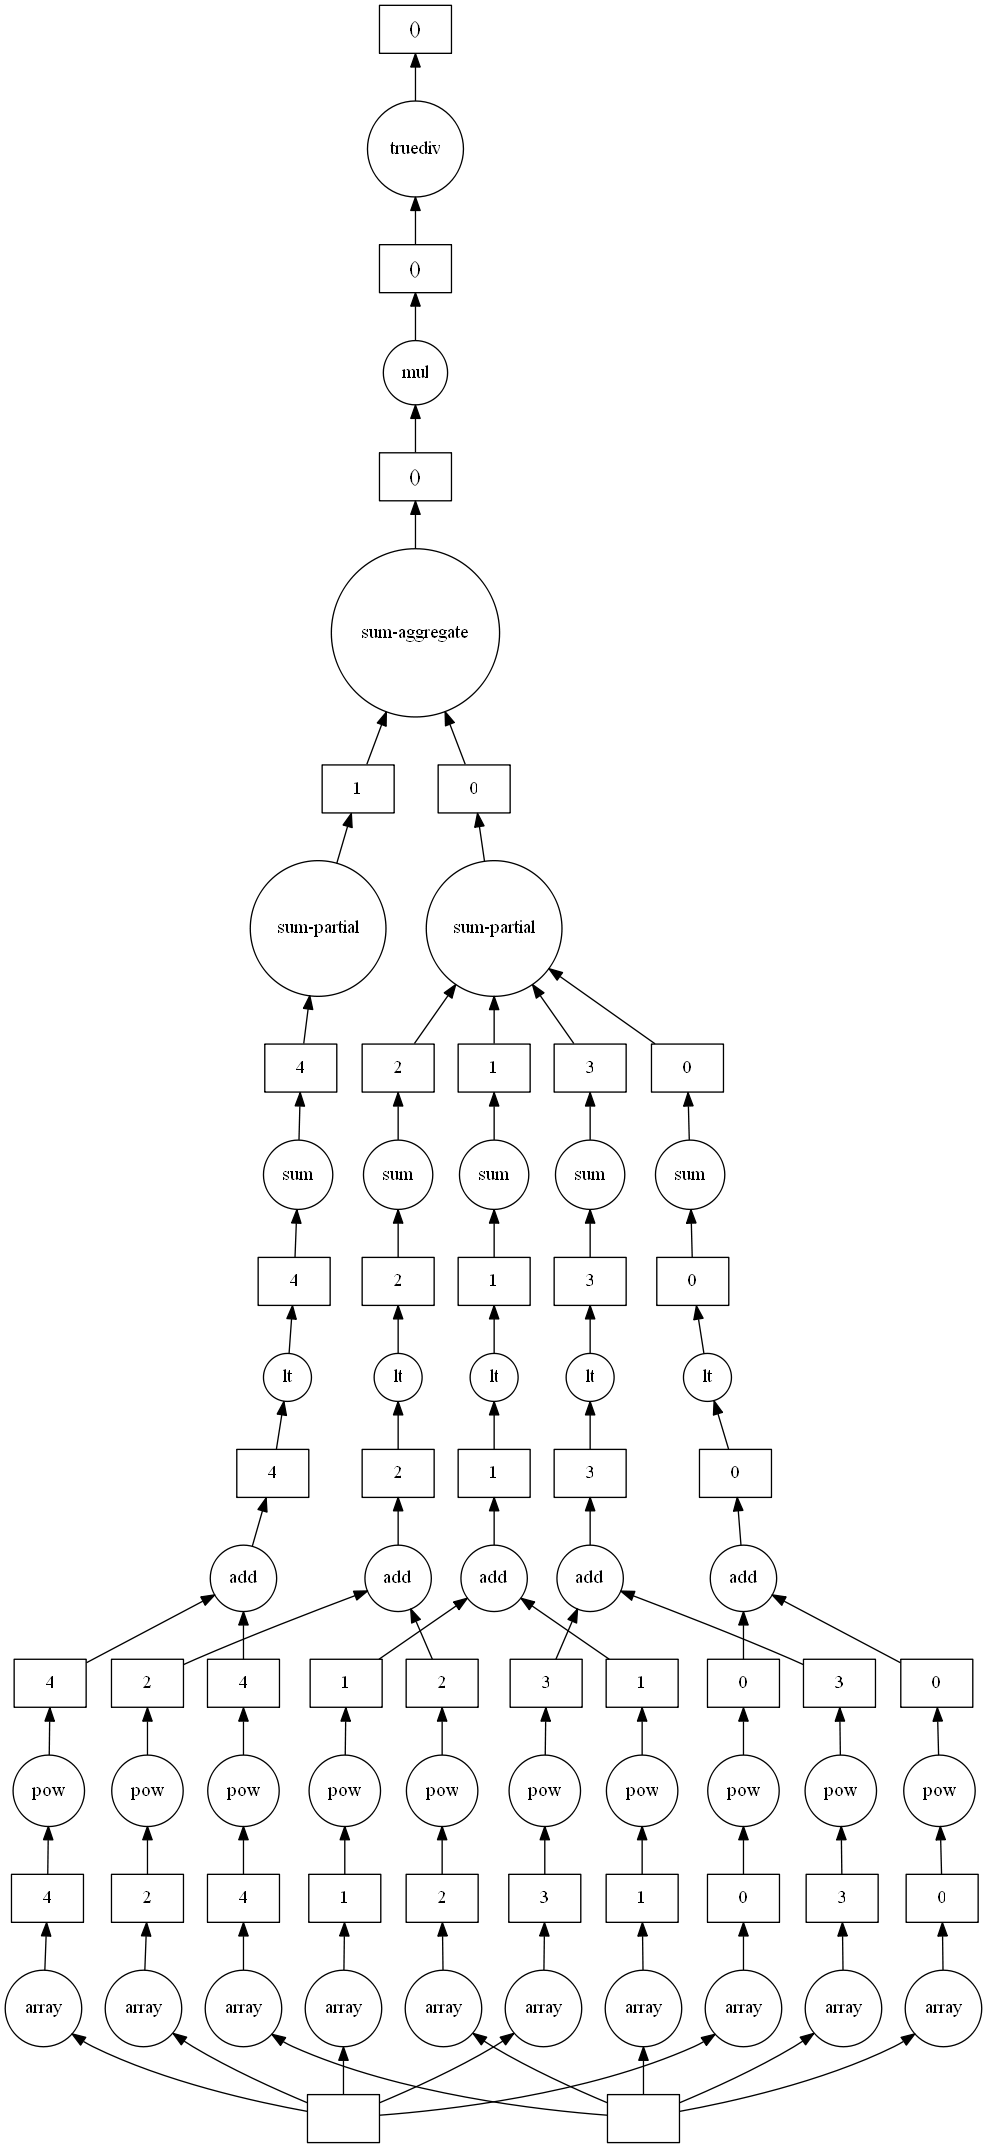

In [2]:
pi.visualize()

In [3]:
import dask.array as da
import numpy as np
import time

start = time.time()

N = 100000000
hits = 0
for i in range(N):
    x = np.random.uniform(-1,1)
    y = np.random.uniform(-1,1)
    if x**2 + y**2 <=1:
        hits += 1
p1 = 4*hits/N
end = time.time()
print(p1)
print(end-start)

3.14162416
253.45279049873352


<font size=6 color="red">dask bag and dataframe</font>

In [5]:
import dask.bag as dab
dab.from_sequence(range(100),npartitions=4)
print(dab_bag.compute())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [20]:
import dask.bag as dab
collection = dab.from_sequence([
    "the cat sat on the mat",
    "the dog sat on the mat"],
    npartitions=2
)

binop = lambda total, x:total + x["count"]
combine = lambda a ,b : a+b
result = collection.\
map(str.split).\
flatten().\
map(lambda x : {"word":x,"count":1}).\
foldby(lambda x :x["word"],binop,0,combine,0)
print(result.compute())

[('the', 4), ('cat', 1), ('sat', 2), ('on', 2), ('mat', 2), ('dog', 1)]


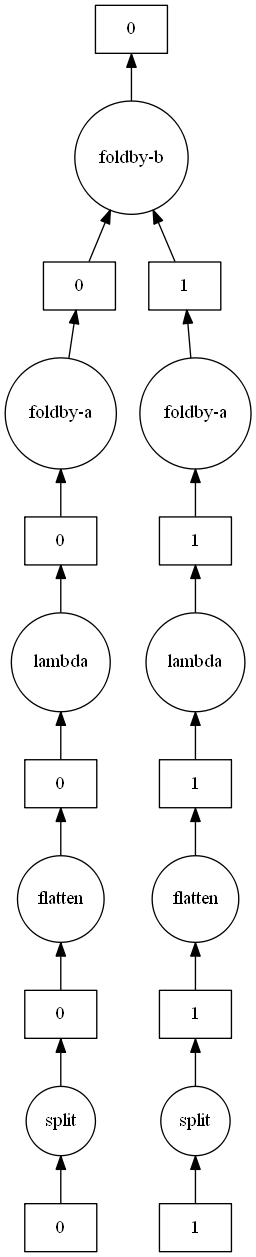

In [22]:
result.visualize()

In [ ]:
import dask.bag as dab
collection = dab.from_sequence([
    "the cat sat on the mat",
    "the dog sat on the mat"],
    npartitions=2
)

binop = lambda total, x:total + x["count"]
combine = lambda a ,b : a+b
result = collection.\
map(str.split).\
flatten().\
map(lambda x : {"word":x,"count":1}).\
foldby(lambda x :x["word"],binop,0,combine,0)
print(result.compute())

In [31]:
import dask.bag as dab
collection = dab.from_sequence([
    "the cat sat on the mat",
    "the dog sat on the mat"],
    npartitions=2
)
def binop(total,x):
    return total + x["count"]
def combine(a,b):
    return a+b
def f1(x):
    return {"word":x,"count":1}
def f2(x):
    return x["word"]

result1 = collection.map(str.split)
result2 = result1.flatten()
result3 = result2.map(f1)
result4 = result3.foldby(f2,binop,0,combine,0)
print(result4.compute())

[('the', 4), ('cat', 1), ('sat', 2), ('on', 2), ('mat', 2), ('dog', 1)]


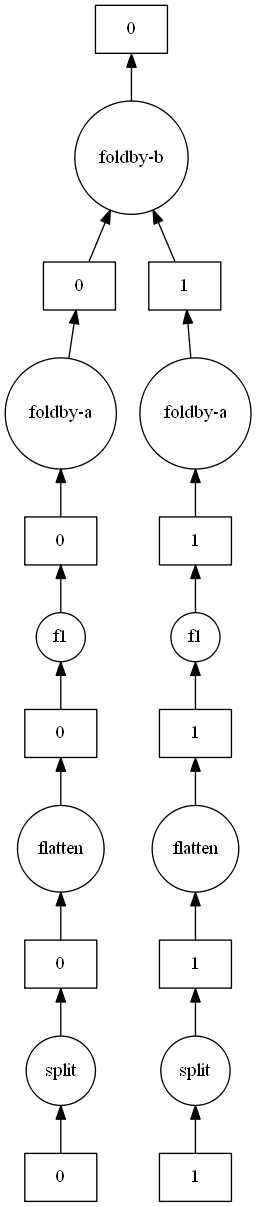

In [32]:
result4.visualize()

<font size=6 color="red">dask dataframe</font>

In [19]:
%%time
####读一个2.5G的csv
# 先导入需要的库
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import dask.dataframe as dd
import dask
import gc
# 先用pandas读取整个文件
train = pd.read_csv("C:/Users/zyy/Desktop/test.csv")
print("Pandas dataframe : ",train.shape)
gc.collect()

MemoryError: Unable to allocate 128. KiB for an array with shape (16384,) and data type int64

In [20]:
%%time
# 再用dask读取
train_df = dd.read_csv("C:/Users/zyy/Desktop/test.csv",dtype='str')
print("Pandas dataframe : ",train_df.shape)
print("1:",train_df.head())
gc.collect()

Pandas dataframe :  (Delayed('int-62ad1439-dfad-4448-8204-ecfa018eada0'), 36)
1:    0  23  0.9403  0.0006    965    1.02  17 23.1 17.1 23.2  ... 5.1  24  \
0  0   7  1.0006   0.004    548  1.2433   6    8    6    8  ...   5  11   
1  0   7  1.0006   0.004    548  1.2433   7   12    7   12  ...   5  11   
2  0  10  0.9769  0.0004  1,165  1.2665   3    2    3    2  ...   5  23   
3  0  23  0.9472  0.0006  1,487  1.3045   8   13    8   13  ...   5   7   
4  0  14  0.9472  0.0006  1,487  1.3045  13   20   13   20  ...   3  20   

   48649 0.2 0.3 0.4 0.5 0.6 0.7 0.8  
0  26778   0   0   1   1   0   0   0  
1   8751   0   0   2   2   0   0   0  
2  43854   0   0   0   0   0   0   0  
3  12505   1   0   0   0   0   0   0  
4  60093   1   0   0   0   0   0   0  

[5 rows x 36 columns]
Wall time: 1.85 s


658

In [1]:
from dask.distributed import Client

client = Client('192.168.31.156:8786')

In [11]:
def square(x):
    return x**2

#fut = clinet.submit(square,2)

futs = client.map(square,[0,1,2,3,4])

client.gather(futs)  ######获取结果

[0, 1, 4, 9, 16]

In [6]:
from dask.distributed import Client
from time import time
 
 
def square(x):
    return x ** 2
 
 
if __name__ == '__main__':
    MAX = 1000
    st = time()
    client = Client('192.168.31.156:8786')   # 这里的地址记得根据我上面说的修改掉。
    A = client.map(square, range(MAX))
    total = client.submit(sum, A)
    print(total.result())
    #total.visualize()
    et = time()
    print(et - st)

TimeoutError: Timeout